Dataset: English Premier League, uploaded by SAIF UDDIN on Kaggle.
https://www.kaggle.com/datasets/saife245/english-premier-league

# EPL Match Result Prediction: Multi-class, Home Team Win vs Draw vs Loss

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_dataset.csv', index_col=0)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,27,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,67,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


## Data pre-processing

In [3]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts'],
      dtype='object')

- ATLossStreak#: boolean; away team's losing streak
- HTLossStreak#: boolean; home team's losing streak
- ATWinStreak#: boolean; away team's winning streak
- HTWinStreak#: boolean; home team's winning streak
- HM#: Home match #: W, L, D, M: M prolly means unknown or no match before?
- HTFormPts: sum of form points for the past 5 matches; W: 3 pts, D: 1 pt, L: 0 pt
- HTFormPtsStr: above in string, like WWWWW for 15 pts
- AM# 
- ATFormPts
- ATFormPtsStr
- DiffFormPts: Difference in form points
- ATGC: away team goals conceded (prolly cumulative)
- HTGC: home team goals conceded
- ATGS: away team goals scored
- HTGS: home team goals scored
- ATGD: away team goal difference ATGS-ATGC
- HTGD: home team goal difference HTGS-HTGC
- ATP: Away team points??????? 근데 레인지가 좀 이상함
- HTP: ????
- DiffPts: Differences in points
- MW: Match week

In [4]:
columns_to_drop = [
    'ATFormPtsStr', # Away team past five match results, redundant with AM#
    'HTFormPtsStr', # Home team past five match results, redundant with HM#
    'ATP', 'HTP'    # uncertain, dropped
]

df.drop(columns=columns_to_drop, inplace=True)
print(df.columns) 

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3',
       'AM4', 'AM5', 'MW', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')


In [5]:
df[['AM1', 'AM2', 'AM3', 'AM4', 'AM5']]

,AM1,AM2,AM3,AM4,AM5
0,M,M,M,M,M
1,M,M,M,M,M
2,M,M,M,M,M
3,M,M,M,M,M
4,M,M,M,M,M
...,...,...,...,...,...
6835,D,W,W,W,W
6836,W,D,W,W,W
6837,L,D,D,D,L
6838,W,L,L,D,L


In [6]:
def convert_results_to_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    elif result == 'L':
        return 0
    else: #M; no match before
        return -1

In [7]:
for col in ['AM1', 'AM2', 'AM3', 'AM4', 'AM5']:
    df[col] = df[col].apply(convert_results_to_points)

for col in ['HM1', 'HM2', 'HM3', 'HM4', 'HM5']:
    df[col] = df[col].apply(convert_results_to_points)

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop(columns=['Date'], inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'], drop_first=True)

In [10]:
# Train-test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# separate FTAG and FTHG
X_train = train_df.drop(columns=['FTAG', 'FTHG', 'FTR']) # FTR is the ultimate target, FTAG and FTHG are needed to predict FTR
y_train_tag = train_df['FTAG']
y_train_hg = train_df['FTHG']

X_test = test_df.drop(columns=['FTAG', 'FTHG', 'FTR'])
y_test_tag = test_df['FTAG']
y_test_hg = test_df['FTHG']

## Optimal Hyperparameter finding using GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# FTAG model
rf_tag = RandomForestRegressor(random_state=42)
rf_tag.fit(X_train, y_train_tag)

# FTHG model
rf_hg = RandomForestRegressor(random_state=42)
rf_hg.fit(X_train, y_train_hg)

RandomForestRegressor(random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # n trees
    'max_depth': [None, 10, 20, 30],  # tree maximum depth
    'min_samples_split': [2, 5, 10],  # minimum internal node splitting
}

## FTAG
grid_search_tag = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                 param_grid=param_grid,
                                 cv=5,  # cv done 5 times
                                 scoring='neg_mean_squared_error', 
                                 verbose=2,
                                 n_jobs=-1) 
grid_search_tag.fit(X_train, y_train_tag)  

## FTHG 
grid_search_hg = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               n_jobs=-1)
grid_search_hg.fit(X_train, y_train_hg)

print(f"RESULTS:\n")

print("FTAG model opt hyperparameter:", grid_search_tag.best_params_)
print("FTAG best output (MSE):", -grid_search_tag.best_score_)

print("FTHG model opt hyperparameter", grid_search_hg.best_params_)
print("FTHG best output (MSE):", -grid_search_hg.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
RESULTS:

FTAG model opt hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
FTAG best output (MSE): 1.1531421913728233
FTHG model opt hyperparameter {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
FTHG best output (MSE): 1.5588195464807182


## Model Building + Results

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

best_rf_tag = RandomForestRegressor(
    n_estimators=grid_search_tag.best_params_['n_estimators'],
    max_depth=grid_search_tag.best_params_['max_depth'],
    min_samples_split=grid_search_tag.best_params_['min_samples_split'],
    random_state=42
)

best_rf_hg = RandomForestRegressor(
    n_estimators=grid_search_hg.best_params_['n_estimators'],
    max_depth=grid_search_hg.best_params_['max_depth'],
    min_samples_split=grid_search_hg.best_params_['min_samples_split'],
    random_state=42
)

# FTAG model
best_rf_tag.fit(X_train, y_train_tag)

# FTHG model
best_rf_hg.fit(X_train, y_train_hg)

# performance evaluation
y_pred_tag = best_rf_tag.predict(X_test)
mse_tag = mean_squared_error(y_test_tag, y_pred_tag)
r2_tag = r2_score(y_test_tag, y_pred_tag)
mae_tag = mean_absolute_error(y_test_tag, y_pred_tag)

y_pred_hg = best_rf_hg.predict(X_test)
mse_hg = mean_squared_error(y_test_hg, y_pred_hg)
r2_hg = r2_score(y_test_hg, y_pred_hg)
mae_hg = mean_absolute_error(y_test_hg, y_pred_hg)

print("FTAG Model Performance:")
print(f"MSE: {mse_tag}")
print(f"R²: {r2_tag}")
print(f"MAE: {mae_tag}")

print("\nFTHG Model Performance:")
print(f"MSE: {mse_hg}")
print(f"R²: {r2_hg}")
print(f"MAE: {mae_hg}")

FTAG Model Performance:
MSE: 1.239811747010595
R²: 0.06518657729911492
MAE: 0.8675736903194767

FTHG Model Performance:
MSE: 1.4786500914645555
R²: 0.06588591431053259
MAE: 0.9661130794970855


In [14]:
X_test_res = pd.DataFrame({
    'FTAG': y_pred_tag,
    'FTHG': y_pred_hg
})

In [15]:
def calculate_ftr(row):
    if (row['FTHG'] - row['FTAG']) >= 0.5:
        return 1  # Home win
    elif (row['FTHG'] - row['FTAG']) > -0.5:
        return 0  # Draw
    else: ## FTHG-FTAG ≤ -0.7
        return -1  # Away wins

# FTR_pred
X_test_res['FTR_pred'] = X_test_res.apply(calculate_ftr, axis=1)

In [16]:
res = pd.DataFrame()
res['FTAG'] = y_test_tag
res['FTHG'] = y_test_hg
res['FTR_true'] = res.apply(calculate_ftr, axis=1)

In [17]:
res

,FTAG,FTHG,FTR_true
3238,0,1,1
3805,0,0,0
435,2,2,0
3758,3,2,-1
5985,1,0,-1
...,...,...,...
4856,1,4,1
240,0,1,1
783,2,2,0
1354,0,1,1


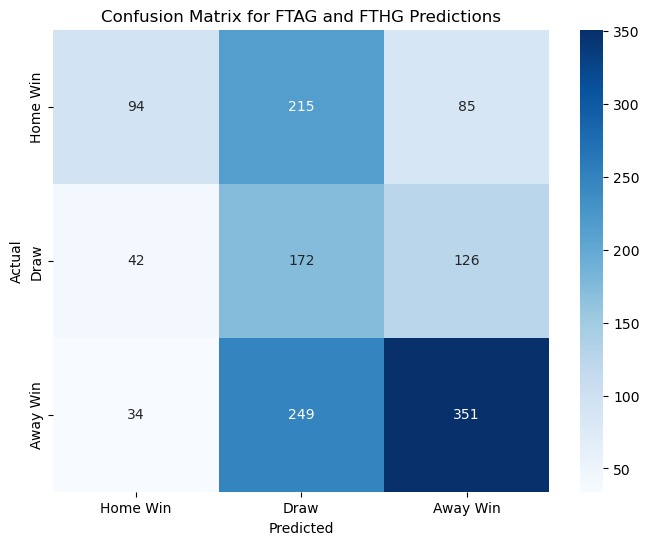

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(res['FTR_true'], X_test_res['FTR_pred'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Home Win', 'Draw', 'Away Win'],
            yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for FTAG and FTHG Predictions')
plt.show()

In [19]:
from sklearn.metrics import classification_report

y_pred = X_test_res['FTR_pred'] 
y_true = res['FTR_true']  

# Classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.55      0.24      0.33       394
           0       0.27      0.51      0.35       340
           1       0.62      0.55      0.59       634

    accuracy                           0.45      1368
   macro avg       0.48      0.43      0.42      1368
weighted avg       0.52      0.45      0.46      1368



Accuracy is better than the random guess (33% since tri-class)!